In [3]:
import numpy as np 
import pandas as pd 
import graphviz
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

In [ ]:
# load the data set
dataset = load_iris(as_frame=True)
df= pd.DataFrame(data= dataset.data)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# add target and target names to dataframe
target_zip= dict(zip(set(dataset.target), dataset.target_names))
df["target"] = dataset.target
df["target_names"] = df["target"].map(target_zip)

print(df.shape)
df.head()

(150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
# seperate to X and Y 
X = df.iloc[:, :4]
y = df.iloc[:, -1]

In [8]:
# split training and test
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=True, random_state=24)

print("X_train shape: ",x_train.shape)
print("y_train shape: ",y_train.shape)

print("X_test shape: ",x_test.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (112, 4)
y_train shape:  (112,)
X_test shape:  (38, 4)
y_test shape:  (38,)


In [9]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

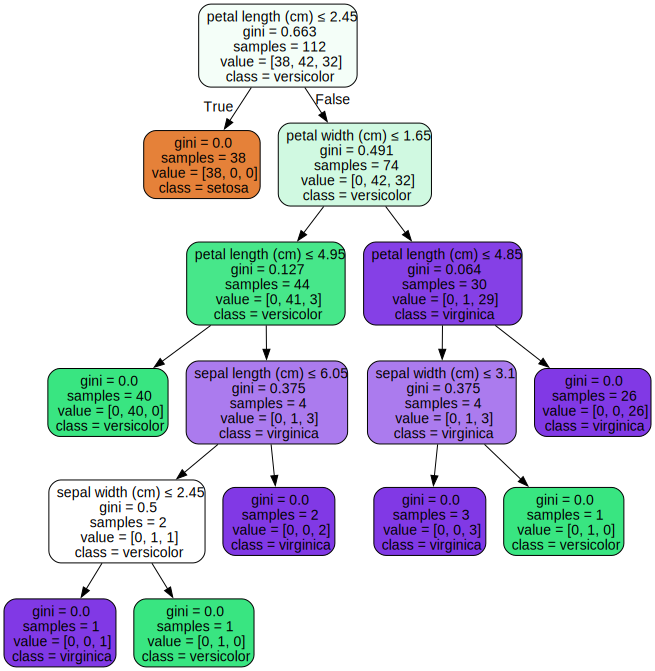

In [10]:
DecisionTreeClassifier()
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns,  
                           class_names=dataset.target_names,  
                           filled=True, rounded=True,  
                           special_characters=True)  

graph = graphviz.Source(dot_data) 

graph

In [11]:
predictions = dt.predict(x_test)
print(predictions)

[np.str_('virginica') np.str_('virginica') np.str_('versicolor')
 np.str_('versicolor') np.str_('virginica') np.str_('setosa')
 np.str_('setosa') np.str_('versicolor') np.str_('setosa')
 np.str_('virginica') np.str_('setosa') np.str_('setosa')
 np.str_('setosa') np.str_('virginica') np.str_('virginica')
 np.str_('setosa') np.str_('virginica') np.str_('setosa')
 np.str_('virginica') np.str_('virginica') np.str_('virginica')
 np.str_('virginica') np.str_('virginica') np.str_('versicolor')
 np.str_('virginica') np.str_('setosa') np.str_('virginica')
 np.str_('virginica') np.str_('setosa') np.str_('virginica')
 np.str_('versicolor') np.str_('setosa') np.str_('virginica')
 np.str_('versicolor') np.str_('virginica') np.str_('virginica')
 np.str_('setosa') np.str_('versicolor')]


In [12]:
N = 10
predicted_label = predictions[N]
predicted_label
y_test = np.array(y_test)
print("True label : ",y_test[N])
print("Predicted label : ",predicted_label)

True label :  setosa
Predicted label :  setosa


In [13]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9736842105263158
